In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np

In [2]:
keyPoints = pd.read_csv('./msrData/a01_s01_e01_skeleton3D.txt',sep=' ',header=None)
keyPoints.columns=['z',"x","y","c"]
order = ["x","y","z"]
keyPoints = keyPoints[order] # 改变顺序和去掉c

[[[ 0.371031  2.674849 -0.371736]
  [ 0.355341  2.678124 -0.014095]
  [ 0.408653  2.581967 -0.190055]
  ...
  [-1.036099  2.625393 -0.356846]
  [-1.024209  2.570371 -0.059421]
  [ 0.659618  2.54721  -0.182593]]

 [[ 0.364387  2.67333  -0.369292]
  [ 0.354103  2.681301 -0.011529]
  [ 0.405307  2.583103 -0.186987]
  ...
  [-1.039201  2.629372 -0.352402]
  [-1.024365  2.569292 -0.05009 ]
  [ 0.656095  2.548676 -0.186989]]

 [[ 0.367061  2.67618  -0.373586]
  [ 0.356458  2.677204 -0.015744]
  [ 0.407699  2.582371 -0.193034]
  ...
  [-1.040892  2.641459 -0.35509 ]
  [-1.022698  2.565357 -0.047707]
  [ 0.658024  2.547168 -0.186728]]

 ...

 [[ 0.368285  2.755948 -0.294912]
  [ 0.365452  2.638963  0.043423]
  [ 0.413967  2.608721 -0.156032]
  ...
  [-1.00674   2.602767 -0.406686]
  [-1.02555   2.576482 -0.124607]
  [ 0.668327  2.581097 -0.143763]]

 [[ 0.372843  2.75663  -0.290799]
  [ 0.367801  2.641092  0.048007]
  [ 0.417113  2.609762 -0.151084]
  ...
  [-1.008548  2.613325 -0.405677]
  [-

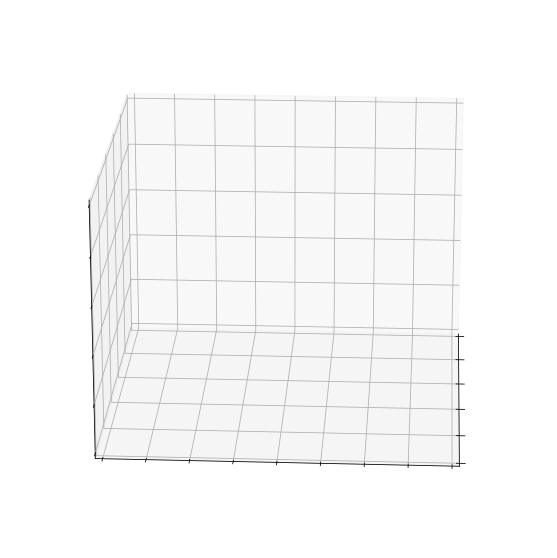

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")

# first frame
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.view_init(20,3)
ax.set_xlim(0, 5)
ax.set_ylim(-1, 1)

DATA = np.array([np.array(keyPoints.iloc[i*20:(i+1)*20]) for i in range(54)])

draw_sequences = np.array([ # 人体骨骼框架连线
    [11,9,7,0,2,1,8,10,12],
    [19,2,3,6],
    [6,4,13,15,17],
    [6,5,14,16,18]
    ],dtype=object)

lines = [ax.plot([],[],[],c="steelblue",marker="o")[0] for _ in range(len(draw_sequences))]

def update(points):
    index = 0
    for seq in draw_sequences:
        # Vertexes = np.array([points[i] for i in seq]).T
        Vertexes = np.array([points[i] for i in seq]).T
        lines[index].set_data(Vertexes[:2,:])
        lines[index].set_3d_properties(Vertexes[2,:])
        index += 1

anim = animation.FuncAnimation(fig,update,DATA,interval=40) # 在interval处修改每帧间隔时间
anim.save("res.mp4",dpi=300)